# Stock Sentiment Analysis
Natural Language Processing project that uses financial news headlines from finviz (https://finviz.com) to visualize and compare stock prospects for selected tickers over time   

The Sentiment Analysis Model is trained under 5 different approaches below, and the one with the best accuracy is selected as the final model.
- MLP (Multi Layer Perceptron)
- CNN (Convolutional Neural Netwrok)
- RNN
- LSTM
- GRU


In [1]:
# All imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

## Training Data Set
Sentiment Analysis data for Financial News (https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)   
This dataset (FinancialPhraseBank) contains the sentiments for financial news headlines from the perspective of a retail investor.

In [2]:
# reading csv file (debugging encoding)
colnames=['label', 'headline'] 
df = pd.read_csv('./data/all-data.csv',delimiter=',',encoding='latin-1', names=colnames, header=None)
df.head()

,label,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
df.shape

(4846, 2)

In [4]:
cnt_pro = df['label'].value_counts()
print(cnt_pro)
print(type(cnt_pro.index))
print(type(cnt_pro.values))

label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


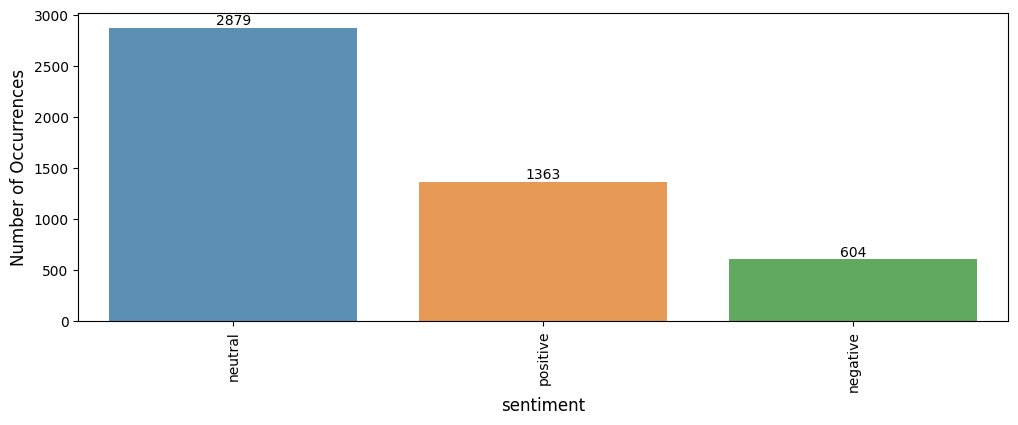

In [5]:
# visualizing data
cnt_pro = df['label'].value_counts()
plt.figure(figsize=(12,4))
# Create the bar plot and store the ax object
ax = sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)

# Add value labels on top of the bars
for p in ax.patches:
    height = int(p.get_height())  # Convert the height to an integer
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Data Processsing
- converting label to numeric (postive: 1, neutral: 0, negative: -1)
- cleaning text: tokenizing, removing punctuation, convert to lowercase
- converting dataframe to numpy arrays
- fixing input data to tensors with same dimensions

In [6]:
#Convert label to numeric
sentiment  = {'positive': 1,'neutral': 0,'negative':-1} 

df.label = [sentiment[item] for item in df.label] 
print(df)

      label                                           headline
0         0  According to Gran , the company has no plans t...
1         0  Technopolis plans to develop in stages an area...
2        -1  The international electronic industry company ...
3         1  With the new production plant the company woul...
4         1  According to the company 's updated strategy f...
...     ...                                                ...
4841     -1  LONDON MarketWatch -- Share prices ended lower...
4842      0  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843     -1  Operating profit fell to EUR 35.4 mn from EUR ...
4844     -1  Net sales of the Paper segment decreased to EU...
4845     -1  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]


In [7]:
# convert headline to list of strings
# removing punctuation
punctstr = string.punctuation
punctstr = punctstr.replace('.','') # don't want to remove periods because they might represent decimal points
print(punctstr)

!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~


In [8]:
# cleaning text: puncuation, convert to lowercase
punctstr = string.punctuation
punctstr = punctstr.replace('.','') # don't want to remove periods because they might represent decimal points

def cleanText(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', punctstr))
    text = text.replace(' s ', ' ') # removing 's
    text = text.split()
    return text

df['headline'] = df['headline'].apply(cleanText)

In [9]:
print(df[:20].headline)
print(len(df.loc[1863, 'headline']))

0     [according, to, gran, the, company, has, no, p...
1     [technopolis, plans, to, develop, in, stages, ...
2     [the, international, electronic, industry, com...
3     [with, the, new, production, plant, the, compa...
4     [according, to, the, company, updated, strateg...
5     [financing, of, aspocomp, growth, aspocomp, is...
6     [for, the, last, quarter, of, 2010, componenta...
7     [in, the, third, quarter, of, 2010, net, sales...
8     [operating, profit, rose, to, eur, 13.1, mn, f...
9     [operating, profit, totalled, eur, 21.1, mn, u...
10    [teliasonera, tlsn, said, the, offer, is, in, ...
11    [stora, enso, norske, skog, mreal, upmkymmene,...
12    [a, purchase, agreement, for, 7200, tons, of, ...
13    [finnish, talentum, reports, its, operating, p...
14    [clothing, retail, chain, seppælæ, sales, incr...
15    [consolidated, net, sales, increased, 16, to, ...
16    [foundries, division, reports, its, sales, inc...
17    [helsinki, afx, shares, closed, higher, le

In [10]:
#split into training and testing data (80% - 20%)
X = df.drop('label', axis=1)  # Features
y = df['label']              # Target

# Set the proportion for training and testing (e.g., 80% for training, 20% for testing)
test_size = 0.2

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [11]:
print(X_train)
print(y_train)

                                               headline
432   [in, russia, raisio, food, division, home, mar...
3071  [operators, only, need, to, learn, how, to, us...
289   [the, company, expects, its, net, sales, in, t...
2588  [the, bridge, will, be, 1.2, km, long, and, is...
4121  [nokia, and, capcom, announced, that, resident...
...                                                 ...
4426  [the, currency, effect, had, a, 3.0, pct, or, ...
466   [lidskoe, pivo, investment, program, foresees,...
3092  [products, include, consumer, electronics, dev...
3772  [the, bridge, is, part, of, the, highway, 14, ...
860   [adp, news, oct, 1, 2008, finnish, consulting,...

[3876 rows x 1 columns]
432     0
3071    0
289     1
2588    0
4121    0
       ..
4426   -1
466     1
3092    0
3772    0
860     1
Name: label, Length: 3876, dtype: int64


In [12]:
# convert the training and testing data into numpy arrays
X_train= X_train['headline'].values
X_test = X_test['headline'].values

print(X_train)
print(type(X_train))


[list(['in', 'russia', 'raisio', 'food', 'division', 'home', 'market', 'stretches', 'all', 'the', 'way', 'to', 'vladivostok', '.'])
 list(['operators', 'only', 'need', 'to', 'learn', 'how', 'to', 'use', 'one', 'device', 'for', 'multiple', 'levels', 'of', 'applications', 'including', 'voicedirected', 'operations', '.'])
 list(['the', 'company', 'expects', 'its', 'net', 'sales', 'in', 'the', 'first', 'half', 'of', '2008', 'to', 'reach', 'the', 'previous', 'year', 'level', '.'])
 ...
 list(['products', 'include', 'consumer', 'electronics', 'devices', 'such', 'as', 'mobile', 'phones', 'and', 'their', 'accessories', 'settop', 'boxes', 'flat', 'panel', 'tvs', 'as', 'well', 'as', 'system', 'solutions', 'products', 'such', 'as', 'infrastructure', 'systems', 'modules', 'and', 'other', 'industrial', 'segment', 'products', '.'])
 list(['the', 'bridge', 'is', 'part', 'of', 'the', 'highway', '14', 'development', 'project', '.'])
 list(['adp', 'news', 'oct', '1', '2008', 'finnish', 'consulting', 'an

In [13]:
# convert the training and testing data into numpy arrays
# y is a pandas series so require different conversion
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(y_train)
print(type(y_train))

[0 0 1 ... 0 0 1]
<class 'numpy.ndarray'>


In [14]:
# convert headline list to tensor and convert with same length (50)
max_words = 50
X_train = sequence.pad_sequences(X_train, maxlen = max_words, dtype=object)
X_test = sequence.pad_sequences(X_test, maxlen=max_words, dtype=object)

In [15]:
print("X_train.shape: ",  X_train.shape)
print("X_test.shape: " , X_test.shape)

X_train.shape:  (3876, 50)
X_test.shape:  (970, 50)
